## **Sample GSR Plot**

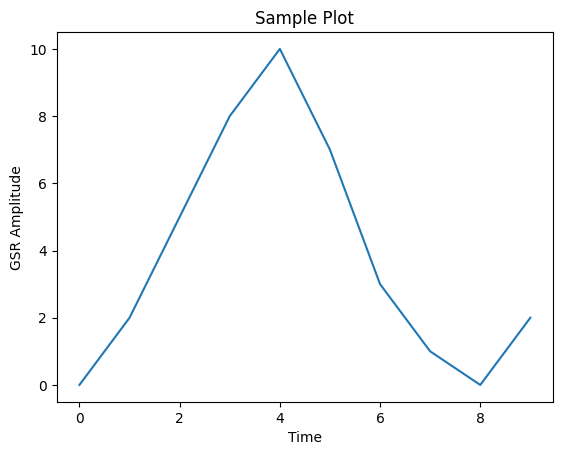

In [1]:
import matplotlib.pyplot as plt

# sample gsr data
time=[0,1,2,3,4,5,6,7,8,9]
gsr_values=[0,2,5,8,10,7,3,1,0,2]

# Plot the gsr values against time
plt.plot(time,gsr_values)
plt.xlabel('Time')
plt.ylabel('GSR Amplitude')
plt.title('Sample Plot')
plt.show()

## **Sample use of dataset**

In [2]:
import pandas as pd
import numpy as np

# Read the CSV file of 10th person's low MWL data
df1=pd.read_csv('models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p10l.csv')
df1.tail(10)

,Trial 1:0back,Trial 6:0back
76790,0.614,3.921
76791,0.614,3.921
76792,0.614,3.922
76793,0.614,3.921
76794,0.614,3.921
76795,0.614,3.921
76796,0.614,3.922
76797,0.614,3.921
76798,0.614,3.921
76799,0.614,3.921


Text(0.5, 0, 'Time(sec)')

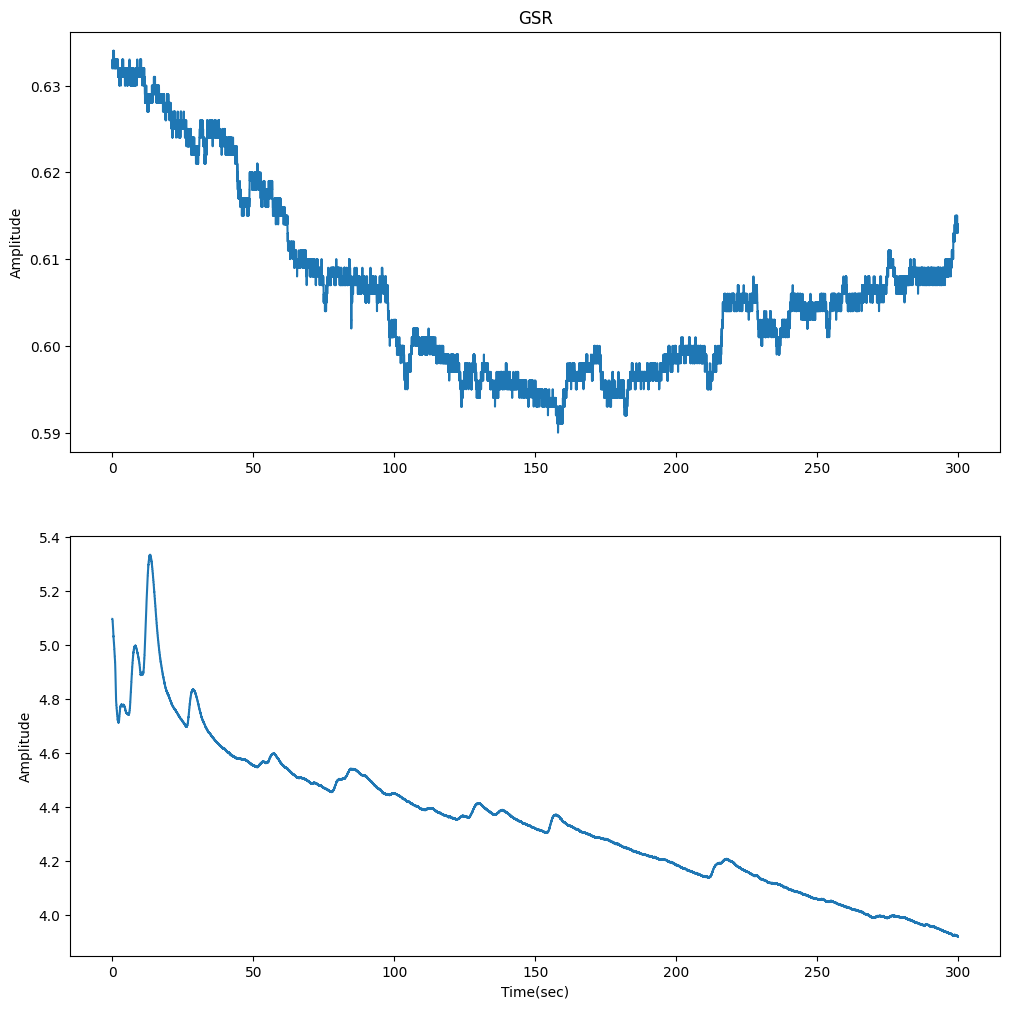

In [3]:
# Extract the required gsr values
gsr_1=df1['Trial 1:0back']
gsr_2=df1['Trial 6:0back']

# Set the sampling rate of gsr data 256 Hz 
sampling_rate=256

# Create a time array based on the sampling rate and length of the gsr values
time=np.arange(len(gsr_1))/sampling_rate

# Plot the gsr values against time
fig, axes = plt.subplots(2, figsize=(12, 12))

# The top panel shows the input signal
ax = axes[0]
ax.plot(time, gsr_1)
ax.set_ylabel("Amplitude")
ax.set_title("GSR")

ax=axes[1]
ax.plot(time,gsr_2)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(sec)")


In [5]:
# Read the CSV file of 10th person's high MWL data
df2=pd.read_csv('models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p10h.csv')
df2.head(10)

,Trial 3:3back,Trial 5:3back
0,2.403,4.060
1,2.403,4.060
2,2.403,4.061
3,2.403,4.062
4,2.403,4.063
5,2.403,4.063
6,2.404,4.063
7,2.403,4.064
8,2.403,4.066
9,2.402,4.066


Text(0.5, 0, 'Time(sec)')

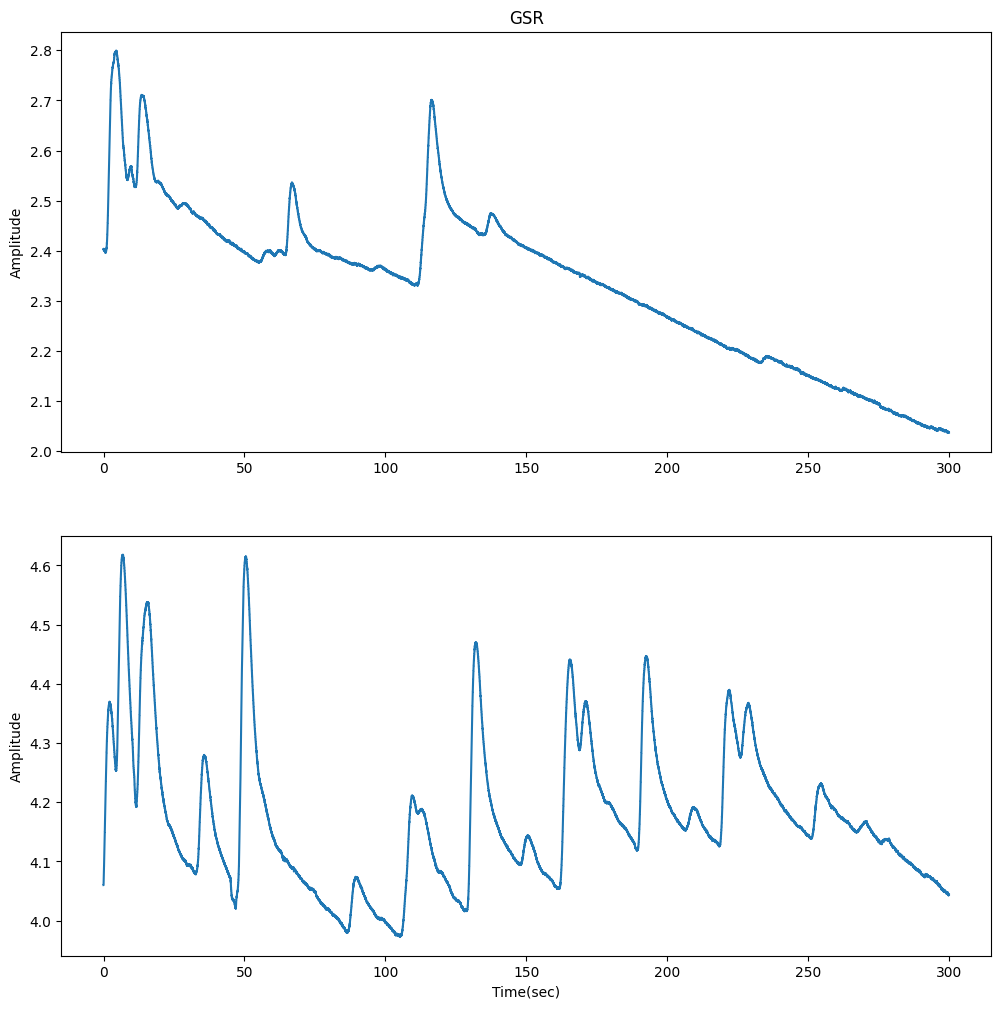

In [6]:
# Extract the required gsr values
gsr_1=df2['Trial 3:3back']
gsr_2=df2['Trial 5:3back']

# Set the sampling rate of gsr data 256 Hz as mentioned in MAUS documentation
sampling_rate=256

# Create a time array based on the sampling rate and length of the gsr values
time=np.arange(len(gsr_1))/sampling_rate

# Plot the gsr values against time
fig, axes = plt.subplots(2, figsize=(12, 12))

# The top panel shows the input signal
ax = axes[0]
ax.plot(time, gsr_1)
ax.set_ylabel("Amplitude")
ax.set_title("GSR")

ax=axes[1]
ax.plot(time,gsr_2)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(sec)")

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the CSV file
df=pd.read_csv('models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p2l.csv')
display(df)    # 2nd person's low mwl data

,Trial 1:0back,Trial 6:0back
0,4.038,6.964
1,4.040,6.967
2,4.041,6.969
3,4.042,6.971
4,4.043,6.972
...,...,...
76795,2.205,4.158
76796,2.206,4.157
76797,2.205,4.157
76798,2.205,4.157


Text(0.5, 0, 'Time(sec)')

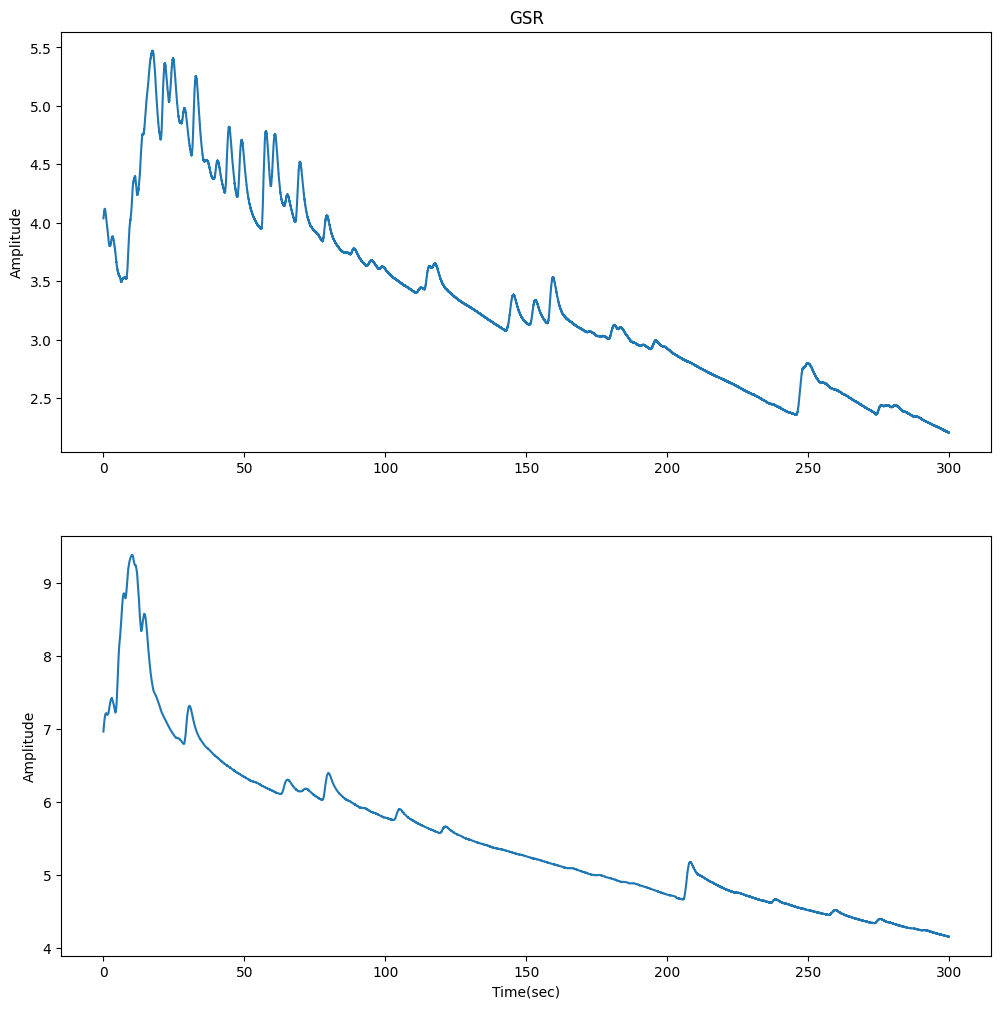

In [9]:
# Extract the required gsr values
gsr_1=df['Trial 1:0back']
gsr_2=df['Trial 6:0back']

# Set the sampling rate of gsr data 256 Hz
sampling_rate=256

# Create a time array based on the sampling rate and length of the gsr values
time=np.arange(len(gsr_1))/sampling_rate

# Plot the gsr values against time
fig, axes = plt.subplots(2, figsize=(12, 12))

# The top panel shows the input signal
ax = axes[0]
ax.plot(time, gsr_1)
ax.set_ylabel("Amplitude")
ax.set_title("GSR")

ax=axes[1]
ax.plot(time,gsr_2)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(sec)")

### Applying Preprocessing as Standard scaling


In [10]:
from sklearn.preprocessing import StandardScaler

set1=df.iloc[0:768]
sc_X = StandardScaler()
X = sc_X.fit_transform(set1)    # gives an array of preprocessed values
X   

array([[ 0.79311317, -2.49231871],
       [ 0.81024059, -2.46482543],
       [ 0.8188043 , -2.44649657],
       ...,
       [-0.61133507,  1.65916719],
       [-0.60277136,  1.65916719],
       [-0.60277136,  1.65000276]])

In [11]:
X.shape  # checking shape of the array

(768, 2)

In [12]:
xdf=pd.DataFrame(X)    # converting array into dataframe
xdf[0]   # Scaled values of column 1

0      0.793113
1      0.810241
2      0.818804
3      0.827368
4      0.835932
         ...   
763   -0.619899
764   -0.611335
765   -0.611335
766   -0.602771
767   -0.602771
Name: 0, Length: 768, dtype: float64

In [13]:
sampling_rate=256   # as defined previously (no change)
signal = xdf[0].values  # array of preprocessed signal values
t=np.arange(len(signal))/sampling_rate

Text(0.5, 1.0, 'Preprocessed GSR')

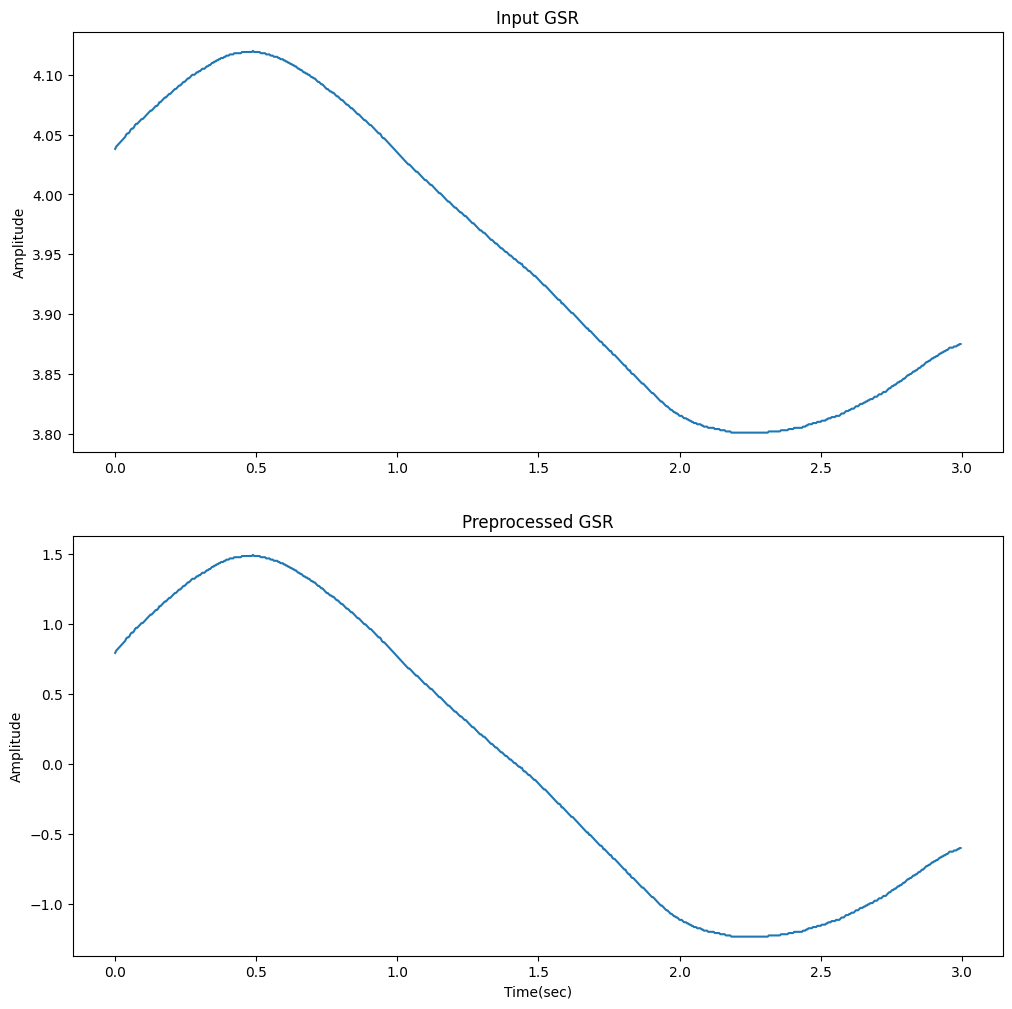

In [14]:
s=set1[['Trial 1:0back']].values
# Plotting the gsr values against time
fig, axes = plt.subplots(2, figsize=(12, 12))

# The input signal v/s preprocessed signal
ax = axes[0]
ax.plot(t,s)
ax.set_ylabel("Amplitude")
ax.set_title("Input GSR")

ax=axes[1]
ax.plot(t,signal)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(sec)")
ax.set_title("Preprocessed GSR")

The **Continuous Wavelet Transform** (CWT) is a mathematical tool used to **analyze both time and frequency characteristics of signals simultaneously**.

- It involves scaling and translating a wavelet function across the signal to capture different frequency components at various time scales. 

- The result is a time-frequency representation known as a **scalogram**, useful for tasks like **signal denoising**, **feature extraction**, and **pattern recognition**. 

- CWT is advantageous for its continuous analysis capability but can be **computationally intensive** compared to the Discrete Wavelet Transform (DWT).

In [16]:
# Importing Pywavelet module
import pywt

**Applying CWT on preprocessed GSR signal**

In [17]:
wavlist=pywt.wavelist(kind='continuous')
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

Normally used (supported) wavelets:
- Mexican Hat (mexh), 
- Morlet (morl),
- Complex Morlet (cmorB-C),
- Gaussian Derivative (gausP),
- Complex Gaussian Derivative (cgauP)
- Shannon (shanB-C),
- Frequency B-Spline (fbspB-C)

In [18]:
l=len(signal)
wavelet = 'morl'  # Morlet wavelet is commonly used

# Calculate Nyquist frequency(nf)
nyquist_freq = sampling_rate / 2
# Although min scale is taken as 1/nf 
# but here its too small therefore we define:
mins=1   # minimum scale
maxs=270  # maximum scale
scales = np.arange(mins,maxs+1)
 
'''
CWT using Python wavelet module (pywt)
- signal: Input Signal (array)
- scales: Scales to be used for CWT (array)
- wavelet: Name of Wavelet used (string)
- Other Parameters:
  - method: {'conv', 'fft'} (optional)
  - sampling_period: Seconds for output freqs (float) (optional)
  - axis: A number (int) (optional)
'''
coef, freqs = pywt.cwt (signal,scales,wavelet)
# coef: CWT coefficients (array)
# freqs: Frequencies corresponding to scales (array)

In [19]:
coef.shape

(270, 768)

In [20]:
freqs.shape

(270,)

**Visualizing CWT**

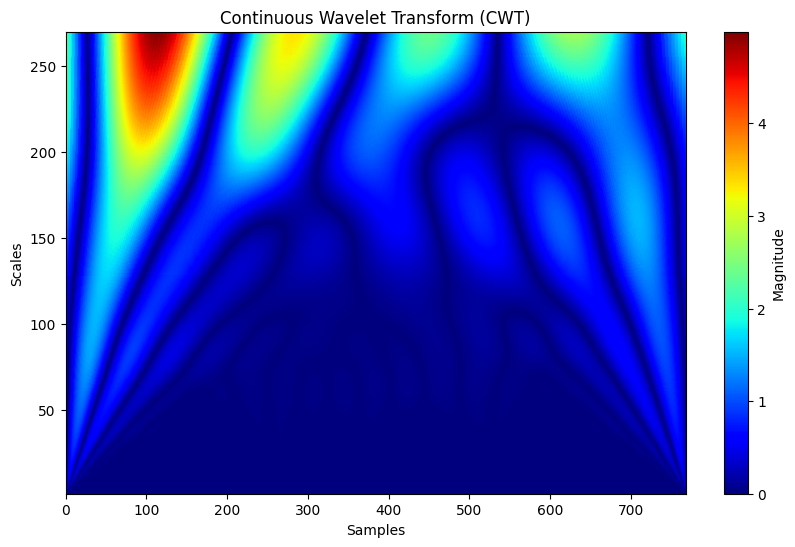

Text(0, 0.5, 'Magnitude')

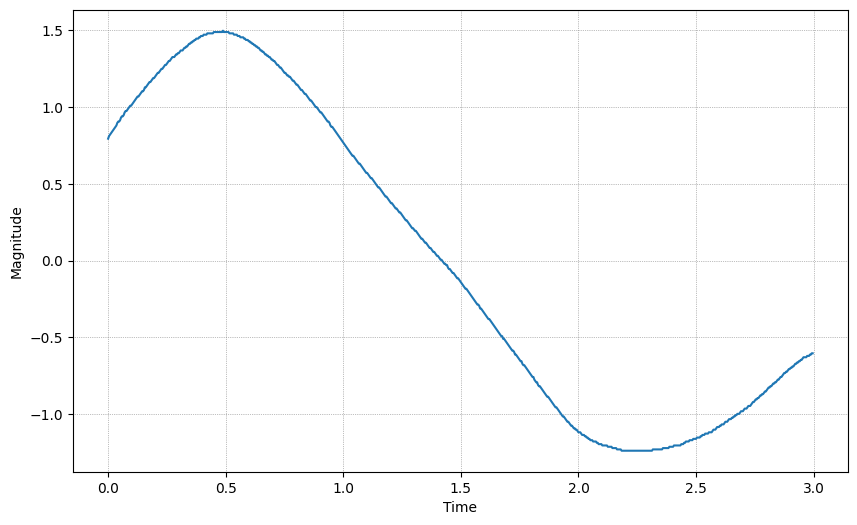

In [21]:
# Plotting Scalogram
plt.figure(figsize=(10,6));
plt.imshow(np.abs(coef), extent=[0,l,maxs,mins], cmap='jet', aspect='auto')
plt.gca().invert_yaxis()
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT)')
plt.xlabel('Samples')
plt.ylabel('Scales')
plt.show()

# Plotting Signal
plt.figure(figsize=(10,6));
plt.plot(t, signal)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Magnitude')

**Repeating the same process from start, for sample of High workload data so as to check if there is any difference in plots or not**

,Trial 3:3back,Trial 5:3back
0,6.786,6.524
1,6.785,6.523
2,6.785,6.524
3,6.785,6.524
4,6.785,6.523
...,...,...
76795,6.718,6.307
76796,6.717,6.307
76797,6.717,6.307
76798,6.717,6.307


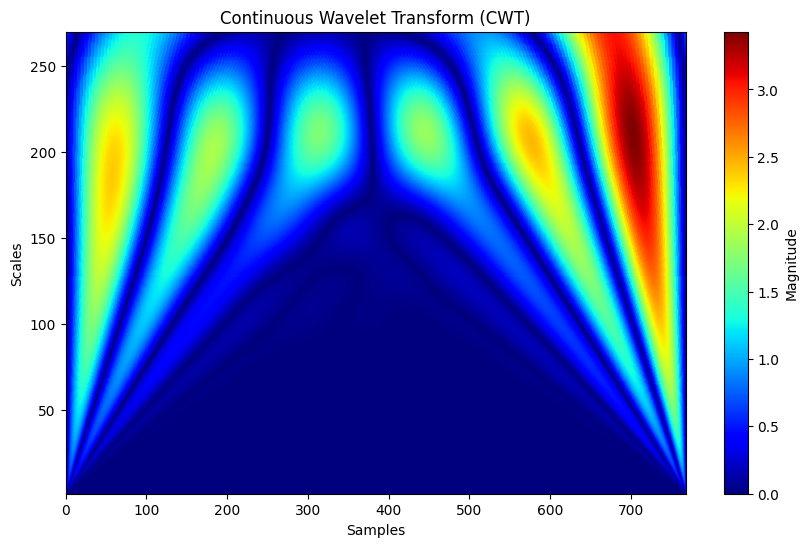

Text(0, 0.5, 'Magnitude')

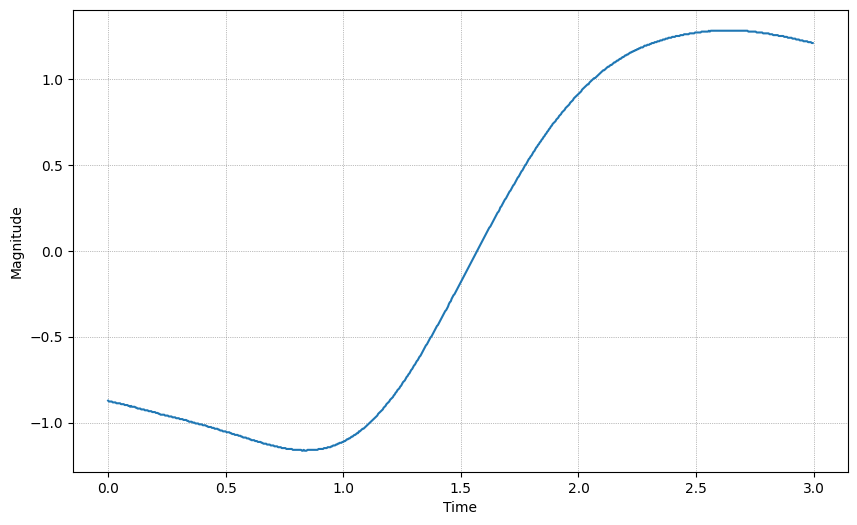

In [22]:
df1=pd.read_csv('models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p2h.csv')
display(df1)         # 2nd person's high mwl data
set2=df1.iloc[0:768]   # extracting first 768 rows
set2

sc_Y = StandardScaler()
Y = sc_Y.fit_transform(set2)
ydf=pd.DataFrame(Y)    

signal2 = ydf[0].values # array of preprocessed signal values of column 1
coef2, freqs2 = pywt.cwt (signal2,scales,'morl')

plt.figure(figsize=(10,6));
plt.imshow(np.abs(coef2), extent=[0,l,maxs,mins], cmap='jet', aspect='auto')
plt.gca().invert_yaxis()
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT)')
plt.xlabel('Samples')
plt.ylabel('Scales')
plt.show()

# Plotting Signal
plt.figure(figsize=(10,6));
plt.plot(t, signal2)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Magnitude')

## Feature Extaction using CWT


In [24]:
# merging twenty two csv files of Low workload
bdata = pd.concat(
    map(pd.read_csv, ['models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p2l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p3l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p4l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p5l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p6l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p8l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p10l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p11l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p12l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p13l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p14l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p15l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p16l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p17l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p18l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p19l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p20l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p21l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p22l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p23l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p24l.csv','models/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p25l.csv']), ignore_index=True)

# merging twenty two csv files of High workload
cdata = pd.concat(
    map(pd.read_csv, ['models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p2h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p3h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p4h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p5h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p6h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p8h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p10h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p11h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p12h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p13h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p14h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p15h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p16h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p17h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p18h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p19h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p20h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p21h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p22h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p23h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p24h.csv','models/gsr-collection-for-mental-strain/High_MWL/High_MWL/p25h.csv']), ignore_index=True)

# Saving combo dataframes as csv files for later application
gsr_high_data = cdata.to_csv('temp/GSR_high.csv', index = True)
gsr_low_data = bdata.to_csv('temp/GSR_low.csv', index = True)

In [25]:
# Low workload data
display(bdata)

,Trial 1:0back,Trial 6:0back
0,4.038,6.964
1,4.040,6.967
2,4.041,6.969
3,4.042,6.971
4,4.043,6.972
...,...,...
1689595,0.220,0.485
1689596,0.220,0.485
1689597,0.220,0.485
1689598,0.220,0.485


In [26]:
# High workload data
display(cdata)

,Trial 3:3back,Trial 5:3back
0,6.786,6.524
1,6.785,6.523
2,6.785,6.524
3,6.785,6.524
4,6.785,6.523
...,...,...
1689595,0.431,0.451
1689596,0.433,0.450
1689597,0.432,0.450
1689598,0.432,0.450


Working on LOW data

In [27]:
# Pre-processing
sc_X = StandardScaler()
X = sc_X.fit_transform(bdata)

low=pd.DataFrame(X)
low['Label']=0
display(low)

,0,1,Label
0,0.729059,1.530305,0
1,0.729808,1.531406,0
2,0.730183,1.532139,0
3,0.730558,1.532873,0
4,0.730933,1.533240,0
...,...,...,...
1689595,-0.702171,-0.846970,0
1689596,-0.702171,-0.846970,0
1689597,-0.702171,-0.846970,0
1689598,-0.702171,-0.846970,0


Capturing featured scalograms for low data in a directory as follows

In [30]:
# Looping/Windowing
import os
from tqdm import tqdm  # For progress bar

setnos, labels, paths = [], [], []
count = 1

print("Capturing starts")
for k in range(0, 2):  # Outer loop
    t=5*k+1
    print(f"\n\n\nTrial {t}")
    for j in tqdm(range(1, 2201)):  # Inner loop with tqdm for progress bar
        i = 0
        while i < 768 * j:
            data_slice = low.iloc[i:i + 768, k]
            i += 768

        signal = data_slice.values
        coef, _ = pywt.cwt(signal, scales, 'morl')
        W = np.abs(coef)

        # Create directory if not exists
        directory = f'./temp/scalogram_low_WL'
        os.makedirs(directory, exist_ok=True)

        # Save scalogram as NumPy array
        file_path = os.path.join(directory, f'image_{count}.npy')
        np.save(file_path, W)

        # Update metadata
        setnos.append(count)
        labels.append(0)
        paths.append(file_path)
        count += 1

print("Capturing ends")

Capturing starts



Trial 1


100%|██████████| 2200/2200 [07:29<00:00,  4.90it/s]





Trial 6


100%|██████████| 2200/2200 [07:20<00:00,  4.99it/s]

Capturing ends


In [31]:
df_scalogram_low=pd.DataFrame(zip(paths,labels,setnos),columns=['Image_path','Label','Set_no'])
df_scalogram_low

,Image_path,Label,Set_no
0,./temp/scalogram_low_WL/image_1.npy,0,1
1,./temp/scalogram_low_WL/image_2.npy,0,2
2,./temp/scalogram_low_WL/image_3.npy,0,3
3,./temp/scalogram_low_WL/image_4.npy,0,4
4,./temp/scalogram_low_WL/image_5.npy,0,5
...,...,...,...
4395,./temp/scalogram_low_WL/image_4396.npy,0,4396
4396,./temp/scalogram_low_WL/image_4397.npy,0,4397
4397,./temp/scalogram_low_WL/image_4398.npy,0,4398
4398,./temp/scalogram_low_WL/image_4399.npy,0,4399


Working on HIGH data

In [33]:
# Pre-processing the data
from sklearn.preprocessing import StandardScaler
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(cdata)

high=pd.DataFrame(Y)
high['Label']=1
display(high)

,0,1,Label
0,1.294932,1.227664,1
1,1.294599,1.227306,1
2,1.294599,1.227664,1
3,1.294599,1.227664,1
4,1.294599,1.227306,1
...,...,...,...
1689595,-0.822600,-0.941763,1
1689596,-0.821934,-0.942120,1
1689597,-0.822267,-0.942120,1
1689598,-0.822267,-0.942120,1


Capturing featured scalograms for high data in a directory as follows

In [34]:
# Looping
setnos2, labels2, paths2 = [], [], []
count = 4401

print("Capturing starts")
for k in range(0, 2):  # Outer loop
    t=2*k+3
    print(f"\n\n\nTrial {t}")
    for j in tqdm(range(1, 2201)):  # Inner loop with tqdm for progress bar
        i = 0
        while i < 768 * j:
            data_slice = high.iloc[i:i + 768, k]
            i += 768

        signal = data_slice.values
        coef, _ = pywt.cwt(signal, scales, 'morl')
        W = np.abs(coef)

        # Create directory if not exists
        directory = f'./temp/scalogram_high_WL'
        os.makedirs(directory, exist_ok=True)

        # Save scalogram as NumPy array
        file_path = os.path.join(directory, f'image_{count}.npy')
        np.save(file_path, W)

        # Update metadata
        setnos2.append(count)
        labels2.append(1)
        paths2.append(file_path)
        count += 1

print("Capturing ends")

Capturing starts



Trial 3


 81%|████████  | 1779/2200 [06:27<01:31,  4.60it/s]


OSError: 207360 requested and 0 written

In [ ]:
df_scalogram_high=pd.DataFrame(zip(paths2,labels2,setnos2),columns=['Image_path','Label','Set_no'])
df_scalogram_high

**Final Data**

In [ ]:
sc_low_data = df_scalogram_low.to_csv('temp/Sc_low.csv', index = True)
sc_high_data = df_scalogram_high.to_csv('temp/Sc_high.csv', index = True)
# merging two csv files of whole featured data
data = pd.concat(
    map(pd.read_csv, ['temp/Sc_low.csv','temp/Sc_high.csv']), ignore_index=True)

In [ ]:
data=data.drop(['Unnamed: 0'], axis=1)
data